This notebook aggregates the Roclico and Saroco datasets, with the purpose of obtaining a dataset of clickbait, satire and neutral Romanian news

Load Roclico Training data

In [14]:
import os
import pandas as pd

protv_df = pd.read_json('roclico/Train/protv.json')
cancan_df = pd.read_json('roclico/Train/cancan.json')
wowbiz_df = pd.read_json('roclico/Train/wowbiz.json')

roclico_train_df = pd.concat([protv_df, cancan_df, wowbiz_df], ignore_index=True)

print(roclico_train_df)

                                                  title  \
0     Influencerița din Croația care a înnebunit Qat...   
1     Starea de sănătate a lui Bruce Willis s-a înră...   
2     Începe sezonul #7 BRD FIRST Tech Challenge Rom...   
3     O nouă idilă la „Mâncare pe care”: „Cred că se...   
4     Vedeta care și-a încărcat imagini deocheate în...   
...                                                 ...   
6801  Calendar Ortodox, Marți, 14 martie 2023. Iată ...   
6802  Fazele Lunii Martie 2023. Vezi pe ce dată apar...   
6803  Calendar Ortodox, Luni, 13 martie 2023. Zi de ...   
6804  El este Sebastian, românul dispărut pe 8 ianua...   
6805  Români implicați într-un accident grav în Unga...   

                                                content      category  
0     Data publicarii: 11 Decembrie 2022 Data actual...     clickbait  
1     Boerescu Data publicarii: 11 Decembrie 2022 Da...  nonclickbait  
2     Boerescu Data publicarii: 11 Decembrie 2022 Da...  nonclickbait  
3  

In [15]:
# Check for missing values
print(roclico_train_df.isnull().sum())

title       0
content     0
category    0
dtype: int64


category
nonclickbait    3527
clickbait       3279
Name: count, dtype: int64


NameError: name 'plt' is not defined

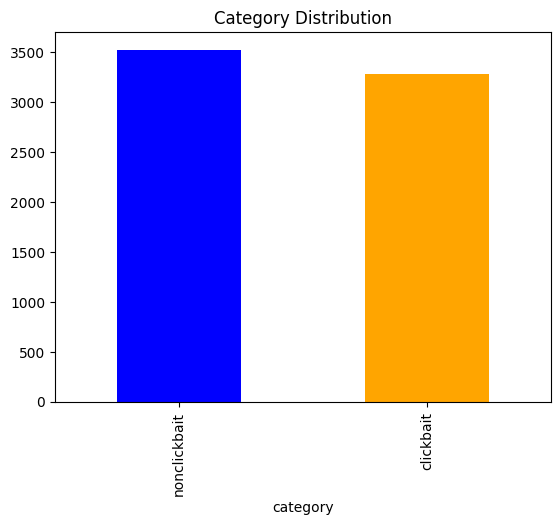

In [16]:
# Value counts of the category
print(roclico_train_df['category'].value_counts())

# Visualize the distribution
roclico_train_df['category'].value_counts().plot(kind='bar', color=['blue', 'orange'], title='Category Distribution')
plt.show()


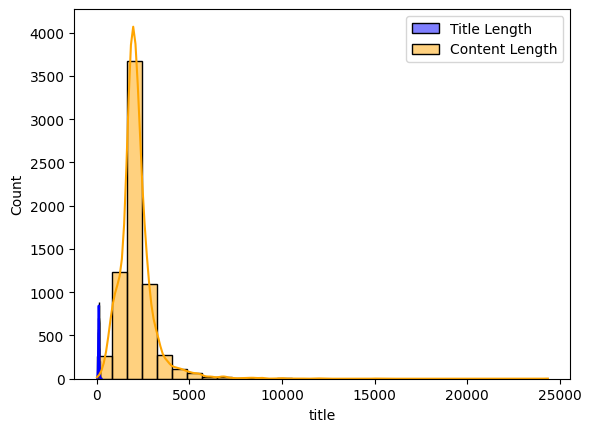

In [14]:
# Plot the distribution
sns.histplot(roclico_train_df['title'].apply(len), kde=True, color='blue', label='Title Length', bins=30)
sns.histplot(roclico_train_df['content'].apply(len), kde=True, color='orange', label='Content Length', bins=30)
plt.legend()
plt.show()


In [17]:
roclico_train_df['category'] = roclico_train_df['category'].replace({'clickbait': 1, 'nonclickbait': 0})


/tmp/ipykernel_180168/810618540.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  roclico_train_df['category'] = roclico_train_df['category'].replace({'clickbait': 1, 'nonclickbait': 0})


In [18]:
roclico_train_df.to_csv('roclico_train_processed.csv', index=False)

In [19]:
saroco_train_df = pd.read_csv('saroco/train.csv')

In [20]:

saroco_train_df = saroco_train_df.dropna()

saroco_train_df = saroco_train_df.drop(columns=['index'])

saroco_train_df.loc[saroco_train_df['category'] == 1, 'category'] = 2

saroco_train_df.head()

,title,content,label
18000,Înotînd printre confrați,"Azi, $NE$ $NE$ ar fi fost testat zilnic de $NE...",2
18001,Confesiunile unui ucigaș în serie,Străzile $NE$ anului 1983 sînt pline de homele...,2
18002,Obrazul subțire cu tăietură se ține,Ascuțirea săbiilor drepte în prăvălia negustor...,2
18003,Comedia cu pălărioară de staniol,South $NE$ funcționează ca o teorie umoristică...,2
18004,Cum știi ce va fi și cînd habar n-ai,Știți cum e cu profețiile din presă? $NE$ că ș...,2


In [21]:
saroco_train_df.to_csv('saroco_train_processed.csv', index=False)

In [26]:
roclico_train_df = pd.read_csv('roclico_train_processed.csv')
saroco_train_df = pd.read_csv('saroco_train_processed.csv')

In [27]:
saroco_train_df.head()

,title,content,category
0,Înotînd printre confrați,"Azi, $NE$ $NE$ ar fi fost testat zilnic de $NE...",2
1,Confesiunile unui ucigaș în serie,Străzile $NE$ anului 1983 sînt pline de homele...,2
2,Obrazul subțire cu tăietură se ține,Ascuțirea săbiilor drepte în prăvălia negustor...,2
3,Comedia cu pălărioară de staniol,South $NE$ funcționează ca o teorie umoristică...,2
4,Cum știi ce va fi și cînd habar n-ai,Știți cum e cu profețiile din presă? $NE$ că ș...,2


In [28]:
train_merged = pd.concat([saroco_train_df, roclico_train_df], ignore_index=True)

train_merged = train_merged.sample(frac=1, random_state=42).reset_index(drop=True)

train_merged.head()

,title,content,category
0,Mîrlănia e noul umor negru,Primul $NE$ $NE$ a fost la vremea lui un film ...,2
1,Veste bună pentru șoferi! Cum poți scăpa de pl...,O anumită categorie de șoferi a primit o veste...,1
2,"VIDEO Florin Petre, tatăl care a refuzat să mo...",Data: 09 Noiembrie 2022 Toți oamenii vor să tr...,0
3,Pe ce dată este sărbătorit Sfântul Daniel 2022...,Vezi pe ce dată este prăznuit Sfântul Daniel 2...,1
4,"Citit, plăcut, poate vom reveni","E.A. Poe, $NE$ $NE$ $NE$ şi alte povestiri, $...",2


In [29]:
train_merged.to_csv('train_merged.csv', index=False)

Test Aggregation

In [30]:
import os
import pandas as pd

digi_df = pd.read_json('roclico/Test/digi.json')
libertatea_df = pd.read_json('roclico/Test/libertatea.json')
viva_df = pd.read_json('roclico/Test/viva.json')

roclico_test_df = pd.concat([digi_df, libertatea_df, viva_df], ignore_index=True)

print(roclico_test_df)

                                                  title  \
0     O femeie a născut pe neaşteptate în toaleta un...   
1     Erdogan i-a cerut lui Putin să „curețe” nordul...   
2     Video  Fața lui Tutankhamon a fost dezvăluită ...   
3     VIDEO Un hoț de portofele a povestit cum fură ...   
4     3 morți și 4 răniți, după ce un bărbat a desch...   
...                                                 ...   
1502  Cine este și cum arată mama Danielei Crudu. Fl...   
1503  Cătălin Cazacu, săruturi pasionale cu o blondă...   
1504  Cum s-a îmbrăcat Daniela Crudu la botezul fiic...   
1505  Cine e ispita Andrei Ifrim de la Insula iubiri...   
1506  Cine este ispita Deni Mariș de la Insula Iubir...   

                                                content      category  
0     O tânără a născut pe neaşteptate la bordul unu...  nonclickbait  
1     Erdogan a discutat la telefon, duminică, cu Pu...  nonclickbait  
2     Fața lui Tutankhamon, faimosul faraon egiptean...     clickbait  
3  

In [31]:
# Check for missing values
print(roclico_test_df.isnull().sum())

title       0
content     0
category    0
dtype: int64


In [32]:
roclico_test_df['category'] = roclico_test_df['category'].replace({'clickbait': 1, 'nonclickbait': 0})

/tmp/ipykernel_180168/4078578040.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  roclico_test_df['category'] = roclico_test_df['category'].replace({'clickbait': 1, 'nonclickbait': 0})


In [33]:
roclico_test_df.to_csv('roclico_test_processed.csv', index=False)

In [37]:
saroco_test_df = pd.read_csv('saroco/test.csv')

In [38]:
saroco_test_df = saroco_test_df.dropna()

saroco_test_df = saroco_test_df.drop(columns=['index'])

saroco_test_df.loc[saroco_test_df['category'] == 1, 'category'] = 2

saroco_test_df.head()

,title,content,category
0,Un prof a alergat 8 km ca să urecheze un elev ...,Ăsta dascăl! $NE$ de conștiinciozitate la o ș...,2
1,Gaz $NE$ $NE$ a cerut de la $NE$ 700 milioane ...,"Sloganul lor, $NE$ sare? $NE$ sare”, va fi tra...",2
2,Studiu. Secretul fericirii e să faci zilnic 10...,Avem confirmarea! $NE$ de știință de la $NE$ d...,2
3,Ana $NE$ $NE$ nu vrea să-l lase pe $NE$ la $NE...,Deja au apărut fisuri în echipa anunțată de $N...,2
4,"Aparent, nici la $NE$ nu e apă caldă. Simona $...",Marea noastră campioană $NE$ $NE$ a fost fotog...,2


In [39]:
test_merged = pd.concat([saroco_test_df, roclico_test_df], ignore_index=True)

test_merged = test_merged.sample(frac=1, random_state=42).reset_index(drop=True)

test_merged.head()

,title,content,category
0,Adio $NE$ $NE$ a chemat partidele la consultăr...,Pentru a nu mai irosi bani și timp prețios cu ...,2
1,Eurostat: $NE$ de consum au crescut în $NE$ $N...,"În iulie, prețurile au crescut cel mai mult î...",0
2,Ancheta privind decapitarea profesorului de is...,Presa franceză spune că părintele elevului ca...,0
3,Un român plecat la muncă în străinătate a adus...,Nu e criză de mână de lucru doar în rândul tin...,2
4,Klaus $NE$ $NE$ intenționez să reintroduc star...,"Declarație de presă, susținută de $NE$ $NE$ d...",0


In [40]:
test_merged.to_csv('test_merged.csv', index=False)

In [41]:
train_merged = pd.read_csv('train_merged.csv')

category
2    17949
0     3527
1     3279
Name: count, dtype: int64
                                               title  \
0                         Mîrlănia e noul umor negru   
4                    Citit, plăcut, poate vom reveni   
5       Unele credite se recuperează prin spînzurare   
6         Întortocheatele căi ale diplomației române   
7  Sorina se întoarce la banul public. Sorina $NE...   

                                             content  category  
0  Primul $NE$ $NE$ a fost la vremea lui un film ...         2  
4   E.A. Poe, $NE$ $NE$ $NE$ şi alte povestiri, $...         2  
5  Ultima etapă a campionatului local de $NE$ s-a...         2  
6  În iunie 2013, adică acum aproape doi ani, $NE...         2  
7   ► $NE$ se află într-un con de umbră de cîtva ...         2  


<Axes: title={'center': 'Category Distribution'}, xlabel='category'>

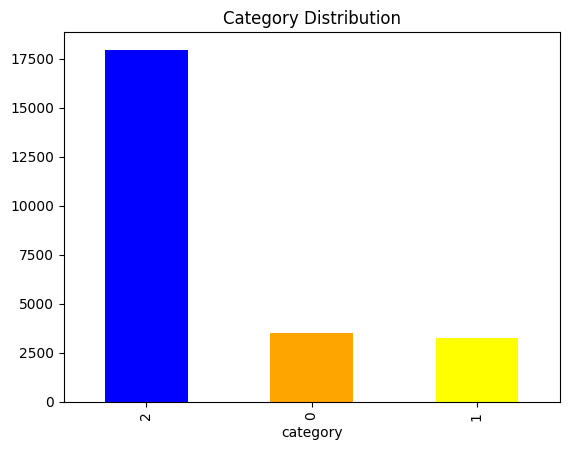

In [43]:
# Value counts of the category
print(train_merged['category'].value_counts())

print(train_merged[train_merged['category'] == 2].head())

# Visualize the distribution
train_merged['category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'yellow'], title='Category Distribution')


category
2    3279
1    3279
0    3279
Name: count, dtype: int64


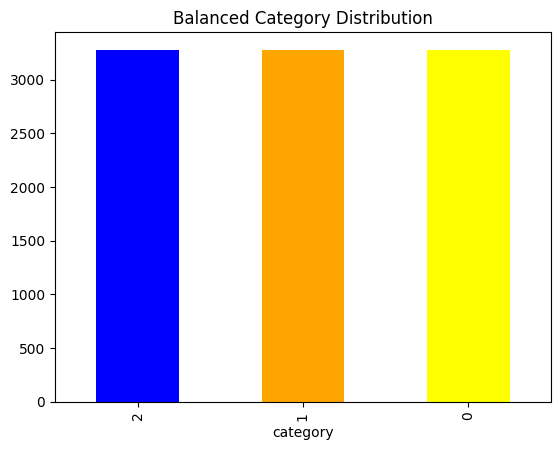

In [44]:
# Determine the target count for each category (minimum count across categories)
min_count = train_merged['category'].value_counts().min()

# Sample the minimum count from each category
balanced_test = pd.concat([
    train_merged[train_merged['category'] == 0].sample(min_count, random_state=42),
    train_merged[train_merged['category'] == 1].sample(min_count, random_state=42),
    train_merged[train_merged['category'] == 2].sample(min_count, random_state=42)
])

# Shuffle the balanced dataset
balanced_test = balanced_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Visualize the new distribution
balanced_test['category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'yellow'], title='Balanced Category Distribution')

balanced_test.to_csv('balanced_train.csv', index=False)

print(balanced_test['category'].value_counts())

category
0    6060
2    4801
1     441
Name: count, dtype: int64
                                                title  \
0   Adio $NE$ $NE$ a chemat partidele la consultăr...   
3   Un român plecat la muncă în străinătate a adus...   
7   Românii, afectaţi şi ei de măsurile anti-musul...   
10  Ca să nu se mai înece alegătorii cu ei, micii ...   
15  Un român era să fie linşat de familie, după ce...   

                                              content  category  
0   Pentru a nu mai irosi bani și timp prețios cu ...         2  
3   Nu e criză de mână de lucru doar în rândul tin...         2  
7   Victime colaterale ale războiului lui $NE$ cu ...         2  
10  În pragul alegerilor, zeci de persoane au căzu...         2  
15  Scene de groază într-o poiană de la marginea ș...         2  


<Axes: title={'center': 'Category Distribution'}, xlabel='category'>

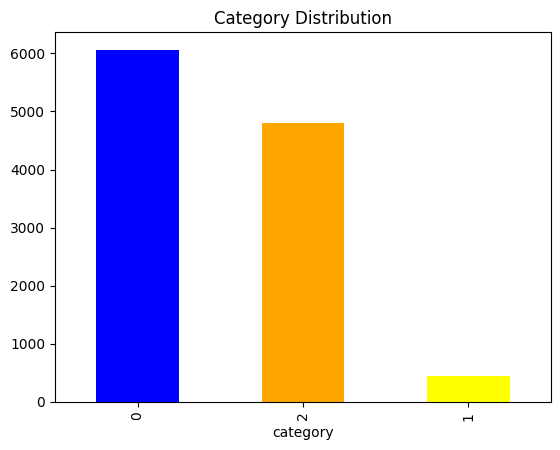

In [45]:
# Value counts of the category
print(test_merged['category'].value_counts())

print(test_merged[test_merged['category'] == 2].head())

# Visualize the distribution
test_merged['category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'yellow'], title='Category Distribution')

category
1    441
0    441
2    441
Name: count, dtype: int64


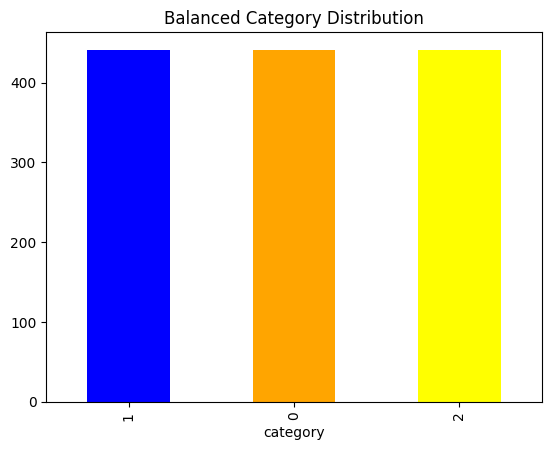

In [46]:
# Determine the target count for each category (minimum count across categories)
min_count = test_merged['category'].value_counts().min()

# Sample the minimum count from each category
balanced_test = pd.concat([
    test_merged[test_merged['category'] == 0].sample(min_count, random_state=42),
    test_merged[test_merged['category'] == 1].sample(min_count, random_state=42),
    test_merged[test_merged['category'] == 2].sample(min_count, random_state=42)
])

# Shuffle the balanced dataset
balanced_test = balanced_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Visualize the new distribution
balanced_test['category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'yellow'], title='Balanced Category Distribution')

balanced_test.to_csv('balanced_test.csv', index=False)

print(balanced_test['category'].value_counts())